In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm

import torch
import torch.nn as nn
from torch.utils.data import ConcatDataset
import torchvision
from torchvision import transforms

from dataloading.ouster import OusterCrop, OusterNormalize, OusterDataset
from network import PilotNet
from trainer import Trainer

import wandb

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
root_path = Path("/media/romet/data2/datasets/rally-estonia/dataset")

dataset_paths = [            
            #root_path / "2021-10-26-10-49-06_e2e_rec_ss20_elva",
#            root_path / "2021-10-26-11-08-59_e2e_rec_ss20_elva_back"
            #root_path / "2021-06-14-11-43-48_e2e_rec_ss14_backwards"
            root_path / "2021-05-28-15-07-56_e2e_sulaoja_20_30"
]

tr = transforms.Compose([OusterCrop(), OusterNormalize()])
trainset = OusterDataset(dataset_paths, transform=None)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True,
                                         num_workers=1, pin_memory=True, persistent_workers=True)
print(len(trainset.frames))

Using only lidar channel None
/media/romet/data2/datasets/rally-estonia/dataset/2021-05-28-15-07-56_e2e_sulaoja_20_30: 10418
10418


torch.Size([3, 128, 1024])


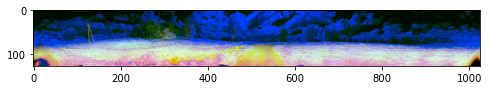

In [101]:
lidar_image = trainset[2000]["image"]
print(lidar_image.shape)
plt.figure(figsize=(8, 8))
plt.imshow(lidar_image.permute(1, 2, 0))

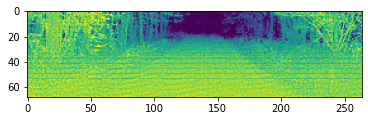

In [96]:
rng = torch.unsqueeze(lidar_image[0], dim=0)
plt.imshow(rng.permute(1, 2, 0))

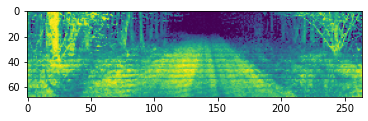

In [97]:
intensity = torch.unsqueeze(lidar_image[1], dim=0)
plt.imshow(intensity.permute(1, 2, 0))

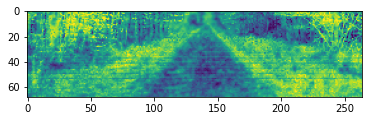

In [98]:
ambience = torch.unsqueeze(lidar_image[2], dim=0)
plt.imshow(ambience.permute(1, 2, 0))